In [2]:
import pywt
import pywt.data
import cv2
import h5py
from typing import Tuple
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import hassCS
import skimage.metrics 
from tqdm.notebook import tqdm
import sewar

In [59]:
import socket
socket.gethostname()

'Phoenix'

In [63]:
with open(r'data\data_filepath.txt', 'r') as file:
    pc_name, filepath = file.read().replace('\n', '').split(',')
    
    if socket.gethostname() == pc_name:
        data_filepath = filepath
    else:
        data_filepath = 'data.h5'
        
data_filepath

'E:\\OneDrive_Wisc\\OneDrive - UW-Madison\\Projects\\Sparse_Fluroescence_Spectra\\Data_20191007_\\data.h5'

In [7]:
filename = data_filepath 
original = h5py.File(filename,'r')
keys= [key for key in original.keys()]

## accessing one file

n1 =original.get(keys[0])
arr = n1[()]

#original = arr

(256, 256, 256)

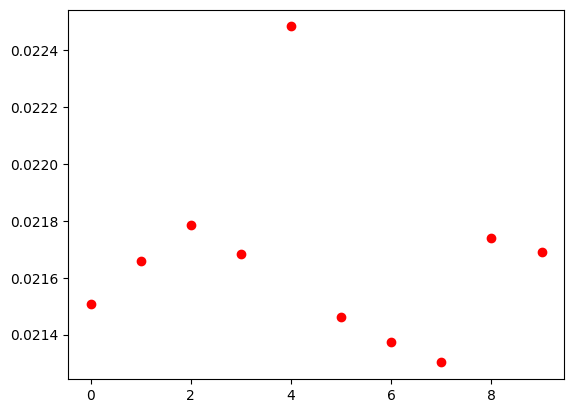

In [8]:
fid = h5py.File(filename,'r')

arr = np.zeros([256,256,256])
for ix,k in enumerate(fid):
    data = fid[k][()]
    if ix==20:
        break
    arr= data + arr
    plt.plot(ix,data.mean(),'or')
arr = np.array(arr)
arr.shape

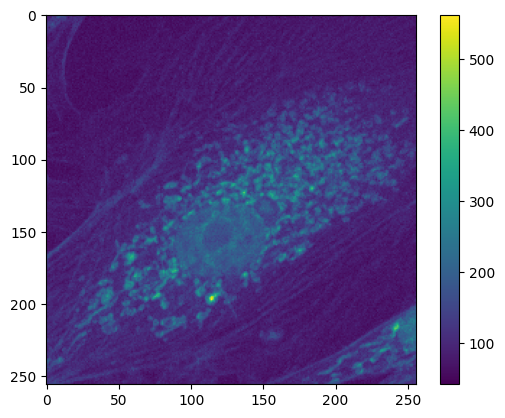

In [9]:
plt.imshow(arr.sum(2))
plt.colorbar()

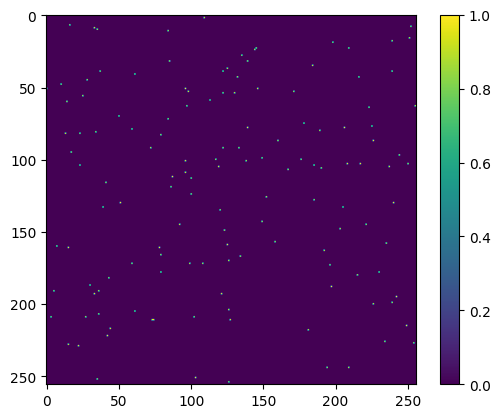

In [25]:
original = arr[:,:,0:6]
plt.imshow(original.sum(2))
plt.colorbar()

8 21358.0 0.7578813627996112
9 49534.0 0.5842738154611682
10 78824.0 0.48383801819322186
11 107784.0 0.42232910280419933
12 136899.0 0.37808769844316825
13 165923.0 0.3456237467562684
14 194839.0 0.3205341784610594
15 223270.0 0.30070323019583906
16 251451.0 0.2843671652279749
17 279766.0 0.26986735460551065
18 308056.0 0.25805346911573385
19 335844.0 0.2478958164017294


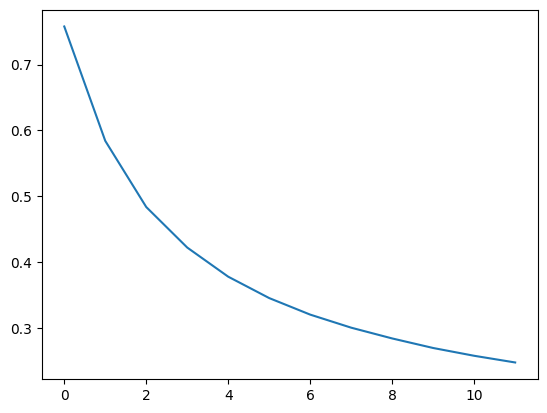

In [29]:
#Sanity check
ordered_sparsity_spectral = []
intensity = []
start_index = 8
for i in range(start_index,20):
    original = arr[:,:,start_index-1:i]
    original = original.sum(2)
    gini = hassCS.gini(original)
    print(i,original.sum(),gini)
    ordered_sparsity_spectral.append(gini)
    intensity.append(original.sum())
#plt.plot(intensity)
plt.plot(ordered_sparsity_spectral)

In [7]:
#  psnr vs  numberofslices, numberoftimebins, alpha, W, W_inv, tau, lambda_, max_iter

In [30]:
psnr = skimage.metrics.peak_signal_noise_ratio

In [31]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


8 0 21358.0,0.76, 0.64
18 10 308056.0,0.26, 0.37
28 20 618903.0,0.20, 0.29
38 30 1123625.0,0.24, 0.24
48 40 1635446.0,0.26, 0.21


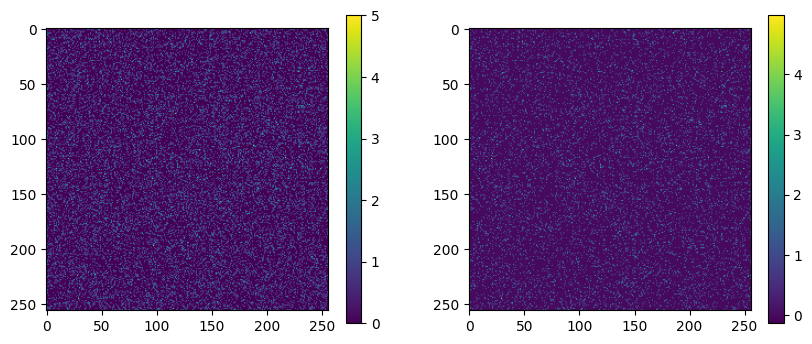

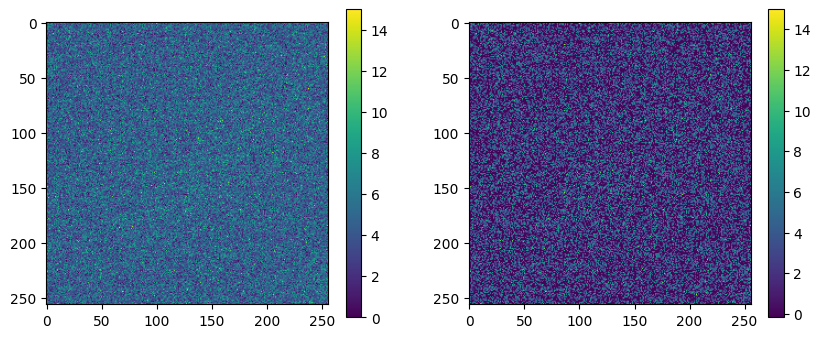

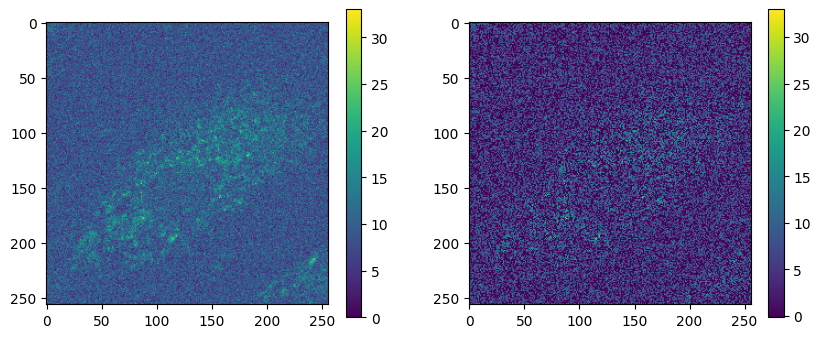

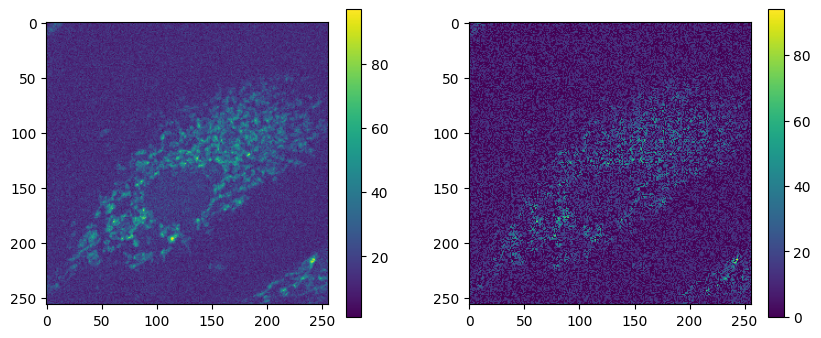

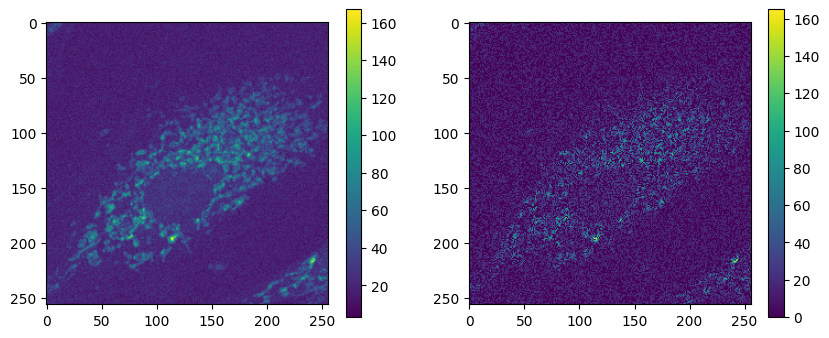

In [55]:
wavelet = "bior1.3"
for i in range(8,50,10):
    original = arr[:,:,7:i]
    original = original.sum(2)
    X_reconstructed, Xw = hassCS.runCS(original,wavelet = wavelet)
    print(i,arr[:,:,8:i].shape[2], f"{original.sum()},{hassCS.gini(original):.2f}, {sewar.scc(original,X_reconstructed):.2f}")
    plt.figure(figsize=[10,4])
    plt.subplot(121)
    plt.imshow(original)
    plt.colorbar()
    plt.subplot(122)
    plt.imshow(X_reconstructed)
    plt.colorbar()
    

In [56]:
%%time
wavelets = ["bior1.3","haar","rbio","gaus","mexh"]
def spectral(arr, wavelet):
    original = []
    sparsity_spectral = []
    img_corr_spectral = []
    for i in range(8,50):
        original = arr[:,:,7:i]
        original = original.sum(2)
        X_reconstructed, Xw = hassCS.runCS(original,wavelet = wavelet)
        sparsity_spectral.append(hassCS.gini(original))
        img_corr_spectral.append(sewar.scc(original,X_reconstructed))
    return sparsity_spectral, img_corr_spectral
bior_sparse, bior_corr = spectral(arr,"bior1.3")
haar_sparse, haar_corr = spectral(arr, "haar")
rbio_sparse, rbio_corr = spectral(arr, "rbio1.3")

#continuous
# gaus_sparse, gaus_corr = spectral(arr, "gaus3")
# mexh_sparse, mexh_corr = spectral(arr, "mexh")


CPU times: total: 49.4 s
Wall time: 49.9 s


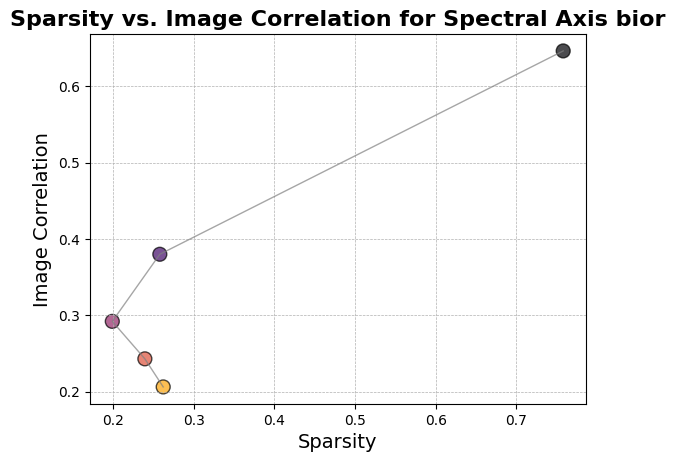

In [54]:
def spectral_plot(sparsity_spectral,img_corr_spectral,wavelet):
    #The lighter the color the larger the slice of spectral used
    cmap = cm.inferno  
    norm = plt.Normalize(0, len(sparsity_spectral))

    colors = cmap(norm(range(len(sparsity_spectral))))
    plt.scatter(sparsity_spectral, img_corr_spectral, c = colors, marker='o', edgecolors='k',s=100, alpha=0.7)

    plt.title(f'Sparsity vs. Image Correlation for Spectral Axis {wavelet}', fontsize=16, fontweight='bold')
    plt.xlabel('Sparsity', fontsize=14)
    plt.ylabel('Image Correlation', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    return plt.plot(sparsity_spectral, img_corr_spectral, color='gray', linewidth=1, alpha=0.7)

spectral_plot(bior_sparse,bior_corr,"bior")

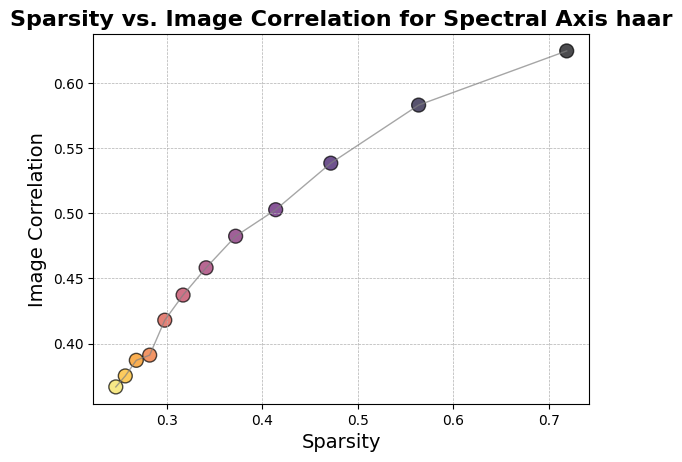

In [36]:
spectral_plot(haar_sparse,haar_corr, "haar")

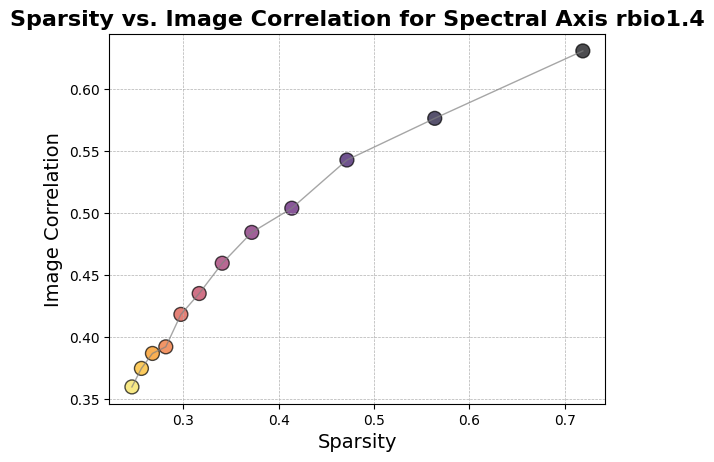

In [37]:
spectral_plot(rbio_sparse, rbio_corr, "rbio1.4")

In [78]:
%%time
sparsity_time = []
img_corr_time = []
for j in range(20):
    time_dim = np.zeros([256,256,256])
    for ix,k in enumerate(fid):
        data = fid[k][()]
        if ix==j+1:
            break
        time_dim= data + time_dim
    time_data = np.array(time_dim)

    time_data = arr[:,:,50:64]
    time_data = time_data.sum(2)
    
    X_reconstructed_time, Xw_time = hassCS.runCS(time_data,wavelet = wavelet)
    sparsity_time.append(hassCS.gini(time_data))
    img_corr_time.append(sewar.scc(time_data,X_reconstructed_time))

CPU times: total: 14.9 s
Wall time: 35.1 s


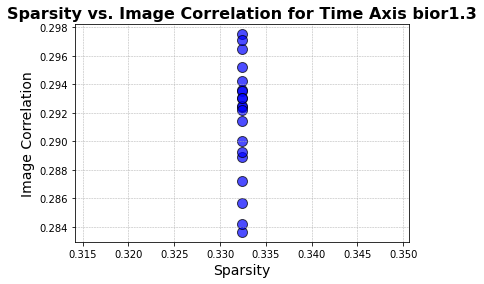

In [100]:
def time_plot(sparsity_time,img_corr_time,wavelet):
    plt.scatter(sparsity_time, img_corr_time, color='b', marker='o', edgecolors='k',s=100, alpha=0.7)

    plt.title(f'Sparsity vs. Image Correlation for Time Axis {wavelet}', fontsize=16, fontweight='bold')
    plt.xlabel('Sparsity', fontsize=14)
    plt.ylabel('Image Correlation', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
time_plot(sparsity_time, img_corr_time,"bior1.3")

In [13]:
X_reconstructed.min(),X_reconstructed.max()

(-0.16516990105767052, 2.9761129662233667)

In [14]:
import skimage.util as sku
Xr = sku.img_as_ubyte(X_reconstructed/X_reconstructed.max())
Xr.min(), Xr.max()

(0, 255)

In [15]:
type(original), type(Xr)

(numpy.ndarray, numpy.ndarray)

In [16]:
# Calculate PSNR and SSIM
psnr_value = psnr(original, Xr,data_range=2**8)
#ssim_value = ssim(arr, X_reconstructed, structural_similarity=True)

print(f"PSNR: {psnr_value}")
#print(f"SSIM: {ssim_value}")


PSNR: 27.333028321465168


Original Image Sparsity: 0.9676133474697961
Image Correlation: 0.4610762672612929


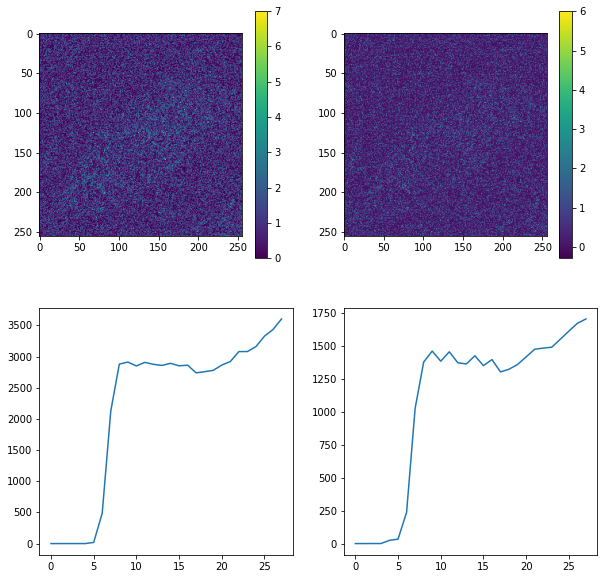

In [23]:
#Want to have something that can detect properties of the image in the space, for example if there are orthogonal lines in a picture can we detect these lines in the space
#Also add better metrics and see if operations are similar
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

original_spectral = original.sum((0,1))
reconstructed_spectral = X_reconstructed.sum((0,1))
im0 = axs[0,0].imshow(original.sum(2))
plt.colorbar(im0)
im1 = axs[0,1].imshow(X_reconstructed.sum(2))
plt.colorbar(im1)
axs[1,0].plot(original_spectral)
axs[1,1].plot(reconstructed_spectral)
print("Original Image Sparsity: "+ str(hassCS.gini(original)))
print("Image Correlation: "+str(sewar.scc(original,X_reconstructed)))

In [18]:
Xw.keys()

dict_keys(['aaa', 'aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd'])

(130, 130, 16)
(130, 130, 16)
(130, 130, 16)
(130, 130, 16)
(130, 130, 16)
(130, 130, 16)
(130, 130, 16)
(130, 130, 16)


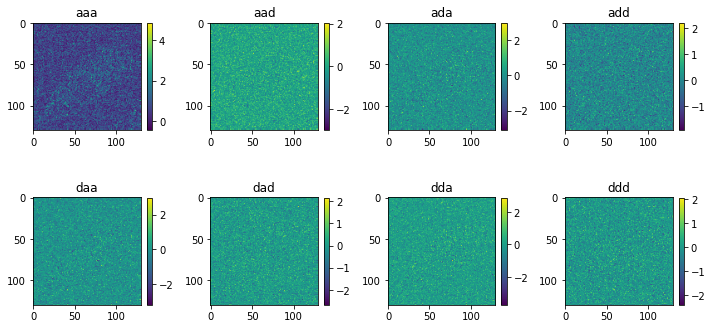

In [19]:
ix=1
plt.figure(figsize=[10,5])
for k in Xw.keys():
    print(Xw[k].shape)
    plt.subplot(2,4,ix)
    ix+=1
    plt.imshow(Xw[k].sum(2))
    plt.colorbar(fraction=.045)
    plt.title(k)
plt.tight_layout()

(130, 130, 16)
(130, 130, 16)
(130, 130, 16)
(130, 130, 16)
(130, 130, 16)
(130, 130, 16)
(130, 130, 16)
(130, 130, 16)


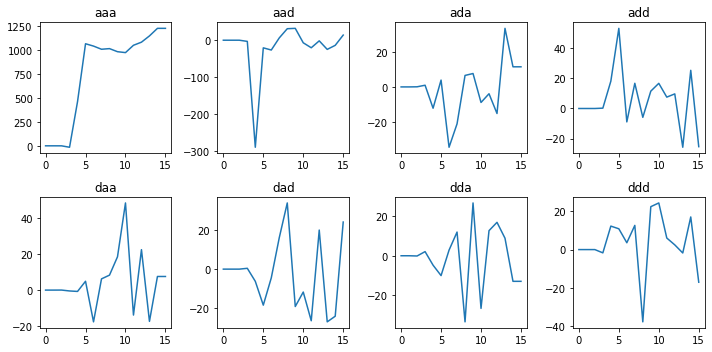

In [20]:
ix=1
plt.figure(figsize=[10,5])
for k in Xw.keys():
    print(Xw[k].shape)
    plt.subplot(2,4,ix)
    ix+=1
    plt.plot(Xw[k].sum((0,1)))
    plt.title(k)
plt.tight_layout()